In [3]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

BikeCrashData = pd.read_csv('../data/NCDOT_BikePedCrash.csv')

In [4]:
# Keeping only the relevant columns-1
BikeCrashData = BikeCrashData[['AmbulanceR',
        'BikeAgeGrp','BikeDir', 'BikeInjury', 'BikePos','BikeRace', 'BikeSex', 
        'City', 'County', 'CrashDay', 'CrashHour', 'CrashMonth','CrashYear','CrashType',
        'NumLanes','RdConditio', 'RdConfig','RdFeature', 'RdSurface', 'RuralUrban', 'SpeedLimit', 'Weather', 'Workzone']]

# Limited features - Analysis with respect to Ambulance reponse

In [5]:

# Adding a binary column for some features
BikeCrashData['AmbR_binary'] = BikeCrashData['AmbulanceR'].apply(lambda x: 1 if x == 'Yes' else 0)

# Making splits, stratifying on Ambulance Response
Bike_train, Bike_test = train_test_split(BikeCrashData.copy(),
                                        shuffle=True, 
                                        test_size=0.2, 
                                        random_state=614,
                                        stratify=BikeCrashData['AmbR_binary'])

# Keeping a holdout set for validation
Bike_train, Bike_val = train_test_split(Bike_train.copy(),
                                        shuffle=True, 
                                        test_size=0.2, 
                                        #random_state=614,
                                        stratify=Bike_train['AmbR_binary'])

## No penalty Logistic regression

### What features should we use to predict ambulance response?

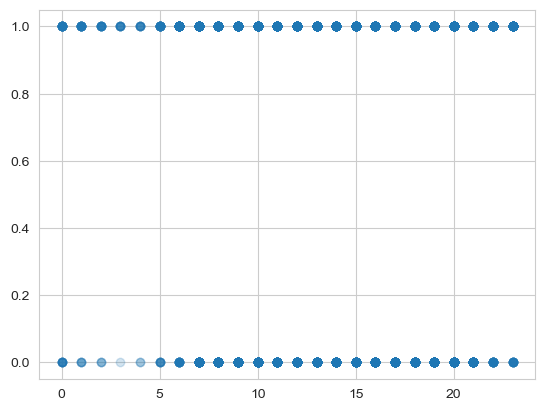

In [6]:
plt.scatter(Bike_train['CrashHour'],Bike_train['AmbR_binary'],alpha=0.1)

In [7]:
# There doesn't seem to be a strong relationship between the hour of the crash and whether or not an ambulance was called.
# Same thing is observed for the day, month, and year of the crash.

<Axes: xlabel='CrashHour', ylabel='AmbR_binary'>

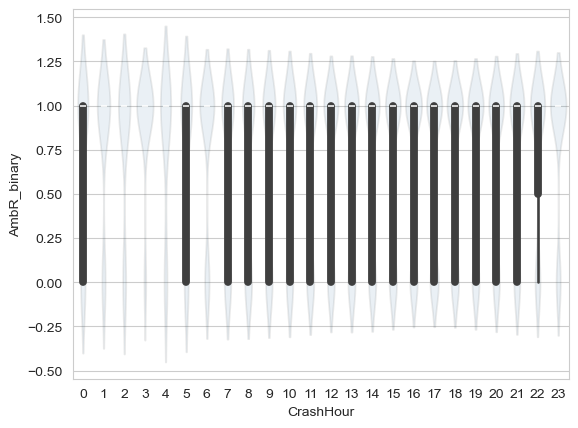

In [8]:
sns.violinplot(x='CrashHour',y='AmbR_binary',data=Bike_train,alpha=0.1)

In [9]:
# Combine hours into day parts
def day_part(hour):
    if hour < 6:
        return 0
    elif hour < 12:
        return 1
    elif hour < 18:
        return 2
    else:
        return 3
    
Bike_train['CrashHour'] = Bike_train['CrashHour'].apply(day_part)
Bike_val['CrashHour'] = Bike_val['CrashHour'].apply(day_part)

<Axes: xlabel='CrashHour', ylabel='AmbR_binary'>

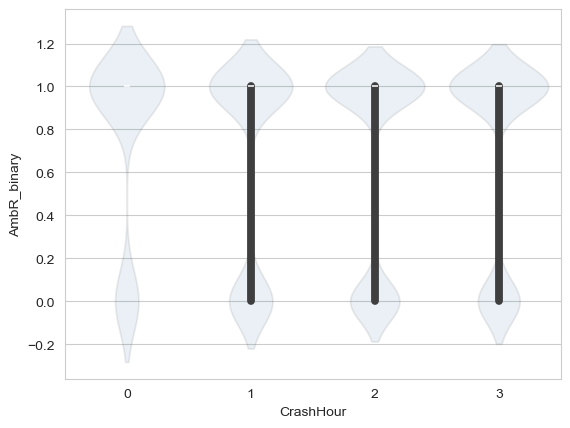

In [10]:
sns.violinplot(x='CrashHour',y='AmbR_binary',data=Bike_train,alpha=0.1)

In [11]:
# Fit logistic regression with default ridge penalty to the training data
log_reg_none=LogisticRegression(penalty=None)
log_reg_none.fit(Bike_train[['CrashHour']],Bike_train['AmbR_binary'])

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['CrashHour']])))
print('Validation Recall:', recall_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['CrashHour']])))
print('Validation Precision:', precision_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['CrashHour']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['CrashHour']])))

Validation Accuracy: 0.6794231835829173
Validation Recall: 1.0
Validation Precision: 0.6794231835829173
Validation Confusion Matrix:
 [[   0  578]
 [   0 1225]]


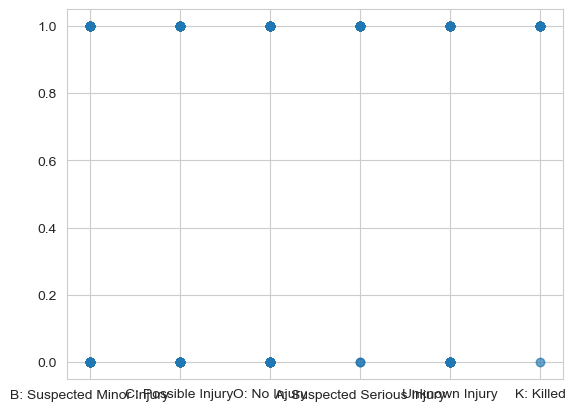

In [12]:
# Let's see how bike injuries are related to ambulance response
plt.scatter(Bike_train['BikeInjury'],Bike_train['AmbR_binary'],alpha=0.1)

<Axes: xlabel='BikeInjury', ylabel='AmbR_binary'>

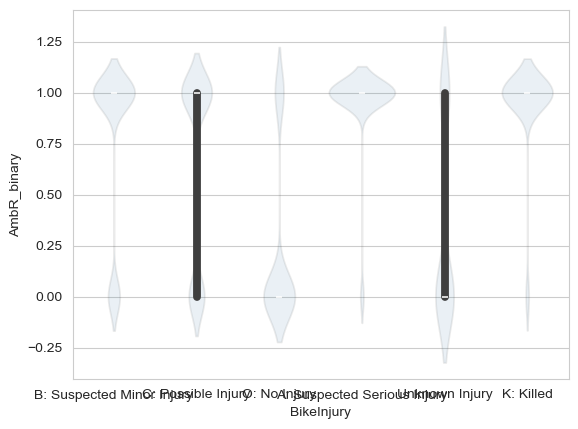

In [13]:
sns.violinplot(x='BikeInjury',y='AmbR_binary',data=Bike_train,alpha=0.1)

In [ ]:
# There doesn't seem to be a strong relationship between the type of injury and whether or not an ambulance was called.
# We will take care of this feature in the next step.

# Recombining speed limit into three categories
# 1. Low (0-25 mph)
# 2. Medium (26-45 mph)
# 3. High (46+ mph)

def speed_limit(x):
    if x in ['5 - 15 MPH', '20 - 25  MPH', 'Unknown']:
        return 'Low or Unknown SpeedLimit'
    
    elif x in ['30 - 35  MPH', '40 - 45  MPH']:
        return 'Medium SpeedLimit'
    
    else:
        return 2
    
Bike_train['SpeedLimit_Cat'] = Bike_train['SpeedLimit'].apply(speed_limit)
Bike_val['SpeedLimit_Cat'] = Bike_val['SpeedLimit'].apply(speed_limit)

<Axes: xlabel='SpeedLimit_Cat', ylabel='AmbR_binary'>

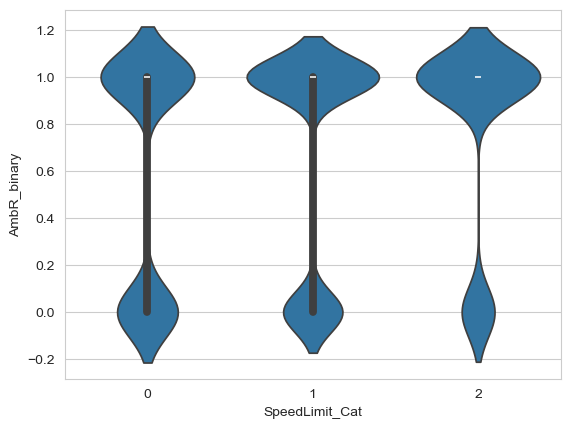

In [15]:
sns.violinplot(x='SpeedLimit_Cat',y='AmbR_binary',data=Bike_train)

In [16]:
# Fit logistic regression with no penalty to the training data
log_reg_none.fit(Bike_train[['SpeedLimit_Cat']],Bike_train['AmbR_binary'])


LogisticRegression(penalty=None)

In [17]:

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Recall:', recall_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Precision:', precision_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))

Validation Accuracy: 0.6794231835829173
Validation Recall: 1.0
Validation Precision: 0.6794231835829173
Validation Confusion Matrix:
 [[   0  578]
 [   0 1225]]


In [18]:
# Fit logistic regression with default ridge penalty to the training data
log_reg_none = LogisticRegression(random_state=614)
log_reg_none.fit(Bike_train[['SpeedLimit_Cat']],Bike_train['AmbR_binary'])

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Recall:', recall_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Precision:', precision_score(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['AmbR_binary'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))

Validation Accuracy: 0.6794231835829173
Validation Recall: 1.0
Validation Precision: 0.6794231835829173
Validation Confusion Matrix:
 [[   0  578]
 [   0 1225]]


In [19]:
# Data imbalance is causing the model to always predict the majority class (1).
# Let's try using a different feature to see if we can get a better model.

# Limited features - Analysis with respect to BikeInjuries

In [20]:
# Dropping unknown injuries
BikeCrashData.drop(BikeCrashData[BikeCrashData['BikeInjury'] == 'Unknown Injury'].index, inplace=True)

# Recombining injuries into two main classes (Light '0' and Severe '1')
BikeCrashData['BikeInjury'] = BikeCrashData['BikeInjury'].replace({'B: Suspected Minor Injury':0,'C: Possible Injury':0, 'O: No Injury':0,'K: Killed':1,'A: Suspected Serious Injury':1 })

# Splitting the data into training and test sets, stratifying on BikeInjury
Bike_train, Bike_test = train_test_split(BikeCrashData.copy(),
                                        shuffle=True, 
                                        test_size=0.2, 
                                        random_state=614,
                                        stratify=BikeCrashData['BikeInjury'])

# Keeping a holdout set for validation
Bike_train, Bike_val = train_test_split(Bike_train.copy(),
                                        shuffle=True, 
                                        test_size=0.2, 
                                        random_state=614,
                                        stratify=Bike_train['BikeInjury'])

C:\Users\ayman\AppData\Local\Temp\ipykernel_10056\2327119755.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BikeCrashData['BikeInjury'] = BikeCrashData['BikeInjury'].replace({'B: Suspected Minor Injury':0,'C: Possible Injury':0, 'O: No Injury':0,'K: Killed':1,'A: Suspected Serious Injury':1 })


In [21]:
# Recombining speed limit into three categories
# 1. Low (0-25 mph)
# 2. Medium (26-45 mph)
# 3. High (46+ mph)

def speed_limit(x):
    if x in ['5 - 15 MPH', '20 - 25  MPH', 'Unknown']:
        return 0
    
    elif x in ['30 - 35  MPH', '40 - 45  MPH']:
        return 1
    
    else:
        return 2
    
Bike_train['SpeedLimit_Cat'] = Bike_train['SpeedLimit'].apply(speed_limit)
Bike_val['SpeedLimit_Cat'] = Bike_val['SpeedLimit'].apply(speed_limit)

<Axes: xlabel='SpeedLimit_Cat', ylabel='BikeInjury'>

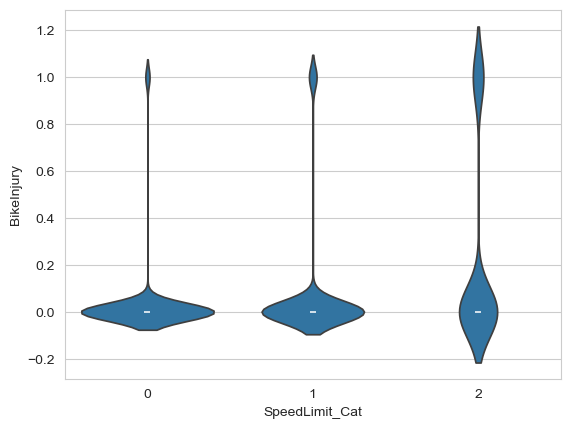

In [22]:
sns.violinplot(x='SpeedLimit_Cat',y='BikeInjury',data=Bike_train)

In [23]:
# This huge data imbalance is a problem for our model. In opposite sense to what we saw before, but still quite problematic.

In [24]:
# Fit logistic regression with no penalty to the training data
log_reg_none = LogisticRegression(random_state=614,penalty=None)
log_reg_none.fit(Bike_train[['SpeedLimit_Cat']],Bike_train['BikeInjury'])


LogisticRegression(penalty=None, random_state=614)

In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Recall:', recall_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Precision:', precision_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))

Validation Accuracy: 0.9245283018867925
Validation Recall: 0.0
Validation Precision: 0.0
Validation Confusion Matrix:
 [[1617    0]
 [ 132    0]]


c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
# Fit logistic regression with default ridge penalty to the training data
log_reg_none = LogisticRegression(random_state=614)
log_reg_none.fit(Bike_train[['SpeedLimit_Cat']],Bike_train['BikeInjury'])

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Recall:', recall_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Precision:', precision_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['SpeedLimit_Cat']])))

Validation Accuracy: 0.9245283018867925
Validation Recall: 0.0
Validation Precision: 0.0
Validation Confusion Matrix:
 [[1617    0]
 [ 132    0]]


c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# Due to the data imbalance, the majority class is being predicted all the time.

<Axes: xlabel='CrashHour', ylabel='BikeInjury'>

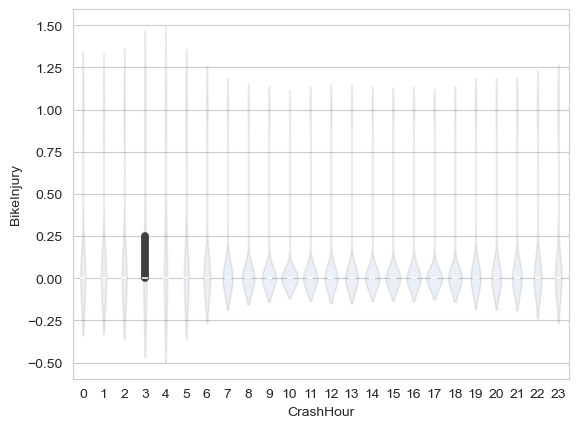

In [28]:
sns.violinplot(x='CrashHour',y='BikeInjury',data=Bike_train,alpha=0.1)

In [29]:
# Let's try using a different feature to see if we can get a better model.
# Combine hours into day parts
def day_part(hour):
    if hour < 6:
        return 0
    elif hour < 12:
        return 1
    elif hour < 18:
        return 2
    else:
        return 3
    
Bike_train['CrashHour'] = Bike_train['CrashHour'].apply(day_part)
Bike_val['CrashHour'] = Bike_val['CrashHour'].apply(day_part)

In [30]:
# Fit logistic regression with default ridge penalty to the training data
log_reg_none=LogisticRegression(penalty=None)
log_reg_none.fit(Bike_train[['CrashHour']],Bike_train['BikeInjury'])

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['CrashHour']])))
print('Validation Recall:', recall_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['CrashHour']])))
print('Validation Precision:', precision_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['CrashHour']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[['CrashHour']])))

Validation Accuracy: 0.9245283018867925
Validation Recall: 0.0
Validation Precision: 0.0
Validation Confusion Matrix:
 [[1617    0]
 [ 132    0]]


c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Accuracy: 0.4368210405946255
Validation Recall: 0.4368210405946255
Validation Precision: 0.29653555897123646
Validation Confusion Matrix:
 [[  0   0  56   5]
 [  0   0 367  26]
 [  0   0 720  57]
 [  0   0 474  44]]


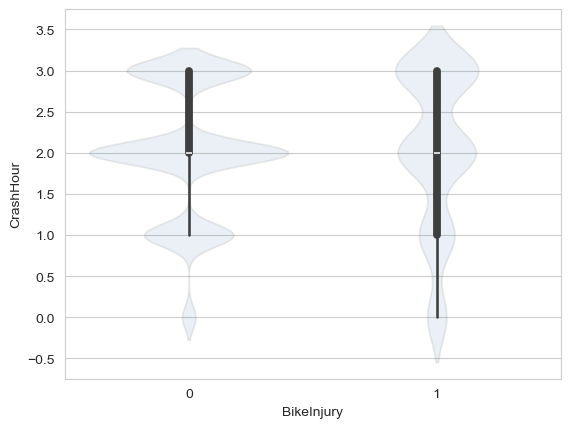

In [31]:
# What if we switched the x and y axes?

sns.violinplot(x='BikeInjury',y='CrashHour',data=Bike_train,alpha=0.1)

# Fit logistic regression with default ridge penalty to the training data
log_reg_none=LogisticRegression(penalty=None,multi_class='multinomial',solver='lbfgs')
log_reg_none.fit(Bike_train[['BikeInjury']],Bike_train['CrashHour'])

# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['CrashHour'],log_reg_none.predict(Bike_val[['BikeInjury']])))
print('Validation Recall:', recall_score(Bike_val['CrashHour'],log_reg_none.predict(Bike_val[['BikeInjury']]), average='micro'))
print('Validation Precision:', precision_score(Bike_val['CrashHour'],log_reg_none.predict(Bike_val[['BikeInjury']]),average='weighted'))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['CrashHour'],log_reg_none.predict(Bike_val[['BikeInjury']])))

In [32]:
# Let's restric to the two most common classes - CrashHour 1 and 2
Bike_train = Bike_train[Bike_train['CrashHour'].isin([1,2])]
Bike_val = Bike_val[Bike_val['CrashHour'].isin([1,2])]

# Fit logistic regression with default ridge penalty to the training data
log_reg_none=LogisticRegression(penalty=None)
log_reg_none.fit(Bike_train[['BikeInjury']],Bike_train['CrashHour'])
# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['CrashHour'],log_reg_none.predict(Bike_val[['BikeInjury']])))
print('Validation Recall:', recall_score(Bike_val['CrashHour'],log_reg_none.predict(Bike_val[['BikeInjury']])))
print('Validation Precision:', precision_score(Bike_val['CrashHour'],log_reg_none.predict(Bike_val[['BikeInjury']])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['CrashHour'],log_reg_none.predict(Bike_val[['BikeInjury']])))



Validation Accuracy: 0.6641025641025641
Validation Recall: 0.0
Validation Precision: 0.0
Validation Confusion Matrix:
 [[  0 393]
 [  0 777]]


c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Given that the data is imbalanced, we will use the class_weight parameter to balance the classes, we will attempt this with the full features.

# Using the full set of features with adjusted columns for some of them

In [39]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


BikeCrashData = pd.read_csv('../data/NCDOT_BikePedCrash.csv')

# Keeping only the relevant columns
BikeCrashData = BikeCrashData[['AmbulanceR',
        'BikeAgeGrp','BikeDir', 'BikeInjury', 'BikePos','BikeRace', 'BikeSex', 
        'CrashDay', 'CrashHour', 'CrashMonth',
        'NumLanes','RdConditio', 'RdConfig','RdFeature', 'RdSurface', 'RuralUrban', 'SpeedLimit', 'Weather', 'Workzone']]


# Recombining speed limit into three categories
# 1. Low (0-25 mph)
# 2. Medium (26-45 mph)
# 3. High (46+ mph)
def speed_limit(x):
    if x in ['5 - 15 MPH', '20 - 25  MPH', 'Unknown']:
        return 0
    
    elif x in ['30 - 35  MPH', '40 - 45  MPH']:
        return 1
    
    else:
        return 2
    
BikeCrashData['SpeedLimit']=BikeCrashData['SpeedLimit'].apply(speed_limit)


# Combine months into seasons
def month_season(x):
    if x in ['December','January', 'February']:
        return 0
    
    elif x in ['March','April', 'May']:
        return 1
    
    elif x in ['June','July', 'August']:
        return 2
    
    else:
        return 3

BikeCrashData['CrashMonth']=BikeCrashData['CrashMonth'].apply(month_season)

# Combine hours into day parts
def day_part(hour):
    if hour < 6:
        return 0
    
    elif hour < 12:
        return 1
    
    elif hour < 18:
        return 2
    
    else:
        return 3
    
BikeCrashData['CrashHour']=BikeCrashData['CrashHour'].apply(day_part)


# Combinging age groups in three categories
def age_group(x):
    if x in ['0-5', '6-10', '11-15', '16-19']:
        return 0
    
    elif x in ['20-24', '25-29', '30-39' ]:
        return 1
    
    else:
        return 2

BikeCrashData['BikeAgeGrp']=BikeCrashData['BikeAgeGrp'].apply(age_group)


# Adding a binary column for the two main targets
BikeCrashData['AmbulanceR']=BikeCrashData['AmbulanceR'].apply(lambda x: 1 if x == 'Yes' else 0) ##### NOTE THE CHANGE in notation here
# Dropping unknown injuries
BikeCrashData.drop(BikeCrashData[BikeCrashData['BikeInjury'] == 'Unknown Injury'].index, inplace=True)
# Recombining injuries into two main classes (Light '1' and Severe '0')
BikeCrashData['BikeInjury']=BikeCrashData['BikeInjury'].replace({'B: Suspected Minor Injury':0,'C: Possible Injury':0, 'O: No Injury':0,'K: Killed':1,'A: Suspected Serious Injury':1 })
# Again, NOTE keeping the minority class as 1 and the majority class as 0. This is important for the model to work properly.


# For other features, we just use get dummies to convert them into binary features
BikeCrashData = pd.get_dummies(BikeCrashData, columns=['BikeDir','CrashDay', 'BikePos','BikeRace', 'BikeSex','NumLanes','RdConditio', 'RdConfig','RdFeature', 'RdSurface', 'RuralUrban', 'Weather', 'Workzone'])*1

C:\Users\ayman\AppData\Local\Temp\ipykernel_46340\1622160596.py:93: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BikeCrashData['BikeInjury']=BikeCrashData['BikeInjury'].replace({'B: Suspected Minor Injury':0,'C: Possible Injury':0, 'O: No Injury':0,'K: Killed':1,'A: Suspected Serious Injury':1 })


In [40]:
BikeCrashData.head()

,AmbulanceR,BikeAgeGrp,BikeInjury,CrashHour,CrashMonth,SpeedLimit,BikeDir_Facing Traffic,BikeDir_Not Applicable,BikeDir_Unknown,BikeDir_With Traffic,...,RuralUrban_Rural,RuralUrban_Urban,Weather_Clear,Weather_Cloudy,"Weather_Fog, Smog, Smoke",Weather_Other,Weather_Rain,"Weather_Snow, Sleet, Hail, Freezing Rain/Drizzle",Workzone_No,Workzone_Yes
0,1,0,0,2,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0
1,1,1,0,1,0,1,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,1,1,0,2,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,1,1,0,2,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,2,0,2,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0


## Focusing on the Ambulance Response prediction first - Useful for the advice directed to the city authorities.

In [41]:
# Splitting the data into training and test sets, stratifying on Ambulance Response
Bike_train, Bike_test = train_test_split(BikeCrashData.copy(),
                                        shuffle=True, 
                                        test_size=0.2, 
                                        random_state=614,
                                        stratify=BikeCrashData['AmbulanceR'])

# Keeping a holdout set for validation
Bike_train, Bike_val = train_test_split(Bike_train.copy(),
                                        shuffle=True, 
                                        test_size=0.2, 
                                        random_state=614,
                                        stratify=Bike_train['AmbulanceR'])

features = Bike_train.drop(columns=['AmbulanceR','BikeInjury']).columns

In [ ]:
log_reg_none = LogisticRegression(random_state=614) # Ridge regularization
log_reg_none.fit(Bike_train[features],Bike_train['AmbulanceR'])
# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['AmbulanceR'],log_reg_none.predict(Bike_val[features])))
print('Validation Recall:', recall_score(Bike_val['AmbulanceR'],log_reg_none.predict(Bike_val[features])))
print('Validation Precision:', precision_score(Bike_val['AmbulanceR'],log_reg_none.predict(Bike_val[features])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['AmbulanceR'],log_reg_none.predict(Bike_val[features])))
print(classification_report(Bike_val['AmbulanceR'],log_reg_none.predict(Bike_val[features])))

Validation Accuracy: 0.6872498570611778
Validation Recall: 0.9793046357615894
Validation Precision: 0.693841642228739
Validation Confusion Matrix:
 [[  19  522]
 [  25 1183]]
              precision    recall  f1-score   support

           0       0.43      0.04      0.06       541
           1       0.69      0.98      0.81      1208

    accuracy                           0.69      1749
   macro avg       0.56      0.51      0.44      1749
weighted avg       0.61      0.69      0.58      1749



In [47]:
for cutoff in np.linspace(0.1,0.9,10):
      ## store the predicted probabilities
      y_prob = log_reg_none.predict_proba(Bike_val[features])[:,1] # Class 1 probabilities

      ## assign the value based on the cutoff
      y_pred = 1*(y_prob > cutoff)

      print("The training precision for a cutoff of",cutoff,
            "is\n", classification_report(Bike_val['AmbulanceR'],y_pred))

c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

The training precision for a cutoff of 0.1 is
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       541
           1       0.69      1.00      0.82      1208

    accuracy                           0.69      1749
   macro avg       0.35      0.50      0.41      1749
weighted avg       0.48      0.69      0.56      1749

The training precision for a cutoff of 0.18888888888888888 is
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       541
           1       0.69      1.00      0.82      1208

    accuracy                           0.69      1749
   macro avg       0.35      0.50      0.41      1749
weighted avg       0.48      0.69      0.56      1749

The training precision for a cutoff of 0.2777777777777778 is
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       541
           1       0.69      1.00      0.82      1208

    accura

c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

## Focusing on the BikeInjuiry severity prediction - Useful for the advice directed to the cyclists.

In [48]:
# Splitting the data into training and test sets, stratifying on Ambulance Response
Bike_train, Bike_test = train_test_split(BikeCrashData.copy(),
                                        shuffle=True, 
                                        test_size=0.2, 
                                        random_state=614,
                                        stratify=BikeCrashData['BikeInjury'])

# Keeping a holdout set for validation
Bike_train, Bike_val = train_test_split(Bike_train.copy(),
                                        shuffle=True, 
                                        test_size=0.2, 
                                        random_state=614,
                                        stratify=Bike_train['BikeInjury'])
                                        

In [49]:
log_reg_none = LogisticRegression(random_state=614) # Ridge regularization
log_reg_none.fit(Bike_train[features],Bike_train['BikeInjury'])
# Evaluate the model on the validation set
print('Validation Accuracy:', accuracy_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[features])))
print('Validation Recall:', recall_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[features])))
print('Validation Precision:', precision_score(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[features])))
print('Validation Confusion Matrix:\n', confusion_matrix(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[features])))
print(classification_report(Bike_val['BikeInjury'],log_reg_none.predict(Bike_val[features])))

Validation Accuracy: 0.923956546598056
Validation Recall: 0.0
Validation Precision: 0.0
Validation Confusion Matrix:
 [[1616    1]
 [ 132    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1617
           1       0.00      0.00      0.00       132

    accuracy                           0.92      1749
   macro avg       0.46      0.50      0.48      1749
weighted avg       0.85      0.92      0.89      1749



In [51]:
for cutoff in np.linspace(0.1,0.9,11):
      ## store the predicted probabilities
      y_prob = log_reg_none.predict_proba(Bike_val[features])[:,1] # Class 1 probabilities

      ## assign the value based on the cutoff
      y_pred = 1*(y_prob > cutoff)

      print("The training precision for a cutoff of",cutoff,
            "is\n", classification_report(Bike_val['AmbulanceR'],y_pred))

The training precision for a cutoff of 0.1 is
               precision    recall  f1-score   support

           0       0.35      0.85      0.49       556
           1       0.79      0.26      0.40      1193

    accuracy                           0.45      1749
   macro avg       0.57      0.56      0.45      1749
weighted avg       0.65      0.45      0.43      1749

The training precision for a cutoff of 0.18 is
               precision    recall  f1-score   support

           0       0.33      0.95      0.49       556
           1       0.82      0.10      0.18      1193

    accuracy                           0.37      1749
   macro avg       0.57      0.53      0.33      1749
weighted avg       0.66      0.37      0.28      1749

The training precision for a cutoff of 0.26 is
               precision    recall  f1-score   support

           0       0.32      0.99      0.49       556
           1       0.86      0.03      0.06      1193

    accuracy                           

c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ayman\anaconda3\envs\erdos_spring_2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap